# Basics of cluster analysis

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [4]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [27]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


## Clustering

In [28]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [29]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [30]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


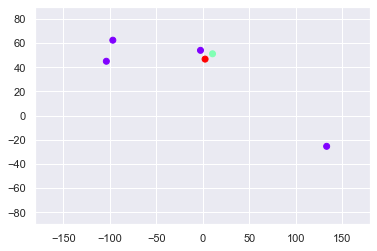

In [31]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()